In [7]:
import tweepy
import pandas as pd
import numpy as np
import nltk
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Create a twitter developer account to get your twitter api keys


In [8]:
# my twitter api keys are in the file "keys.ipynb"
%run ./keys.ipynb

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [10]:
# get his last 'n' tweets
n = 1000
posts = api.user_timeline(screen_name="NarendraModi", count=100, tweet_mode='extended')

In [11]:
i = 1
print("Recent 10 tweets are: \n")
for tweet in posts[:10]:
    print(str(i) + ': ' + tweet.full_text)
    print()
    i += 1

Recent 10 tweets are: 

1: Congratulations to @srikidambi for winning a historic Silver Medal. This win will inspire several sportspersons and further interest in badminton. https://t.co/rxxkBDAwkP

2: Birthday greeting to Union Minister Shri RK Singh Ji. He brings with him great administrative experience and an eye for detail. He is at the forefront of delivering on India’s power sector reforms. Praying for his long and healthy life. @RajKSinghIndia

3: Invigorating Goa with next-generation infrastructure and all-round development. https://t.co/U6xkBrteUs

4: Nobody can forget the exemplary role of Shri Manohar Parrikar in the progress of Goa.  He was a visionary, who worked for Goa and for the entire nation. https://t.co/XY3Ih9z5KF

5: In the last decade, Goa has scaled new heights of progress. 

The Goa Government does work with a clear aim- to ensure complete coverage when it comes to key parameters. https://t.co/CjBlFfMFKX

6: जब गोवा की आजादी के लिए संघर्ष हुआ, तो सब मिलकर एक साथ

In [12]:
recent = api.search_tweets(q="narendra modi", count = 100, lang='en')

In [13]:
x = 1
tweet_list = []
for i in recent[:5]:
    print(str(x) + ': ' + i.text)
    print()
    x += 1

for i in recent:
    tweet_list.append(i.text)

1: Prime Minister Narendra Modi was awarded Bhutan's highest civilian award, which is the Order of The Druk Gyalpo.

W… https://t.co/RRQxmEKdkH

2: RT @SortedEagle: 5. Order of St. Andrew : Russia
12 April 2019
The highest civilian honour of Russia. This award was established in 1698. I…

3: RT @amitmalviya: Narendra Modi is the godson of history, anointed by the Hindu gestalt as India’s god-king. The reason his opponents cannot…

4: RT @OfficeOf_MM: Promote healthy competition between cities for cleanliness: PM Modi at mayors’ conference
https://t.co/djeuDoI2HP

via NaM…

5: RT @theskindoctor13: @ANI File picture of Capt Amrinder Singh licking the feet of Narendra Modi. https://t.co/xhmqw0WQ7o



In [14]:
tweet_list[:10]

["Prime Minister Narendra Modi was awarded Bhutan's highest civilian award, which is the Order of The Druk Gyalpo.\n\nW… https://t.co/RRQxmEKdkH",
 'RT @SortedEagle: 5. Order of St. Andrew : Russia\n12 April 2019\nThe highest civilian honour of Russia. This award was established in 1698. I…',
 'RT @amitmalviya: Narendra Modi is the godson of history, anointed by the Hindu gestalt as India’s god-king. The reason his opponents cannot…',
 'RT @OfficeOf_MM: Promote healthy competition between cities for cleanliness: PM Modi at mayors’ conference\nhttps://t.co/djeuDoI2HP\n\nvia NaM…',
 'RT @theskindoctor13: @ANI File picture of Capt Amrinder Singh licking the feet of Narendra Modi. https://t.co/xhmqw0WQ7o',
 'RT @anuragteddy: Joy Das:- Rahul Gandhi is the reason for Narendra Modi becoming the PM..',
 'RT @SortedEagle: Hon’ble Prime Minister Narendra Modi has received the most Highest Civilian Honours conferred by various countries. Vision…',
 'RT @theskindoctor13: @ANI File picture of Capt 

In [16]:
# def cleantext(text):
#     text = re.sub(r'@[A-Za-z0-9]+',' ',text) #removing mentions
#     text = re.sub(r'#',' ',text) #removing hashtags
#     text = re.sub(r'RT[\s]+',' ',text) #removing rt (retweets)
#     text = re.sub(r'https?:\/\/\S+',' ',text) #removing hyperlinks
    
#     text = text.lower()
#     text = re.sub(r'\W',' ',text)
#     text = re.sub(r'\s+',' ',text)
    
#     return text
    

for i in range(len(tweet_list )):
    tweet_list[i] = re.sub(r'@[A-Za-z0-9]+',' ',tweet_list[i]) #removing mentions
    tweet_list[i] = re.sub(r'#',' ',tweet_list[i]) #removing hashtags
    tweet_list[i] = re.sub(r'RT[\s]+',' ',tweet_list[i]) #removing rt (retweets)
    tweet_list[i] = re.sub(r'https?:\/\/\S+',' ',tweet_list[i]) #removing hyperlinks
    
    tweet_list[i] = tweet_list[i].lower()
    tweet_list[i] = re.sub(r'\W',' ',tweet_list[i])
    tweet_list[i] = re.sub(r'\s+',' ',tweet_list[i])

In [17]:
tweet_list[:10]

['prime minister narendra modi was awarded bhutan s highest civilian award which is the order of the druk gyalpo w ',
 ' 5 order of st andrew russia 12 april 2019 the highest civilian honour of russia this award was established in 1698 i ',
 ' narendra modi is the godson of history anointed by the hindu gestalt as india s god king the reason his opponents cannot ',
 ' _mm promote healthy competition between cities for cleanliness pm modi at mayors conference via nam ',
 ' file picture of capt amrinder singh licking the feet of narendra modi ',
 ' joy das rahul gandhi is the reason for narendra modi becoming the pm ',
 ' hon ble prime minister narendra modi has received the most highest civilian honours conferred by various countries vision ',
 ' file picture of capt amrinder singh licking the feet of narendra modi ',
 ' file picture of capt amrinder singh licking the feet of narendra modi ',
 '5 order of st andrew russia 12 april 2019 the highest civilian honour of russia this award wa

In [18]:
# posts = user posts
# tweet_list = tweets mentioning the user

# tokenize the sentences in the tweet_list and create a word frequency
wordfreq = {}
for sentence in tweet_list:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [19]:
# print(wordfreq)

wordfreq_sorted = sorted(wordfreq.items(), key=lambda x: x[1], reverse=True)
print("The 10 most frequent words are: ")
for x in range(10):
    print(f"{wordfreq_sorted[x][0]} : {wordfreq_sorted[x][1]}")

The 10 most frequent words are: 
modi : 68
the : 67
of : 65
narendra : 59
pm : 47
picture : 35
a : 33
to : 31
on : 29
goa : 28


In [20]:
# creating dataframe
df = pd.DataFrame([x.text for x in recent], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleantext)
df.head()

,Tweets
0,prime minister narendra modi was awarded bhuta...
1,5 order of st andrew russia 12 april 2019 the...
2,narendra modi is the godson of history anoint...
3,_mm promote healthy competition between citie...
4,file picture of capt amrinder singh licking t...


In [21]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,prime minister narendra modi was awarded bhuta...,0.000000,0.000000
1,5 order of st andrew russia 12 april 2019 the...,0.000000,0.000000
2,narendra modi is the godson of history anoint...,0.000000,0.000000
3,_mm promote healthy competition between citie...,0.500000,0.500000
4,file picture of capt amrinder singh licking t...,0.000000,0.000000
...,...,...,...
95,aishwarya on demonetisation i congratulate pm...,0.500000,0.000000
96,gifts worth 600 crores on goa liberation day p...,0.266667,0.083333
97,if sardar patel had lived for a few more year...,0.333333,0.083333
98,aishwarya on demonetisation i congratulate pm...,0.500000,0.000000


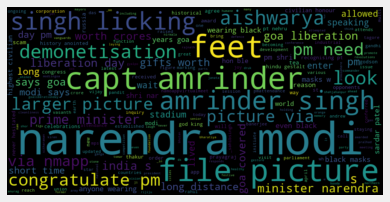

In [22]:
# implementing a text cloud which is a visualization where the most frequent words appear more bigger and bolder
allWords = ' '.join([x for x in df['Tweets']])
wordCloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# function to compute negative, neutral and positive analysis
def getAnalysis(x):
    if x<0:
        return 'Negative'
    elif x>0:
        return 'Positive'
    return 'Neutral'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,prime minister narendra modi was awarded bhuta...,0.000000,0.000000,Neutral
1,5 order of st andrew russia 12 april 2019 the...,0.000000,0.000000,Neutral
2,narendra modi is the godson of history anoint...,0.000000,0.000000,Neutral
3,_mm promote healthy competition between citie...,0.500000,0.500000,Positive
4,file picture of capt amrinder singh licking t...,0.000000,0.000000,Neutral
...,...,...,...,...
95,aishwarya on demonetisation i congratulate pm...,0.500000,0.000000,Neutral
96,gifts worth 600 crores on goa liberation day p...,0.266667,0.083333,Positive
97,if sardar patel had lived for a few more year...,0.333333,0.083333,Positive
98,aishwarya on demonetisation i congratulate pm...,0.500000,0.000000,Neutral


In [24]:
# Show all the positive tweets
ctr = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='True')
# False for sorting in descending order 
for i in range(sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(ctr) + ': ' + sortedDF['Tweets'][i])
        ctr += 1

1:  _mm promote healthy competition between cities for cleanliness pm modi at mayors conference via nam 
2:  joy das rahul gandhi is the reason for narendra modi becoming the pm 
3:  hon ble prime minister narendra modi has received the most highest civilian honours conferred by various countries vision 
4: hon ble prime minister narendra modi has received the most highest civilian honours conferred by various countries 
5:  modiingoa gifts worth 600 crores on goaliberationday pm ji says goa covered a long distance in a shor 
6: gifts worth 600 crores on goa liberation day pm modi says goa covered a long distance in a short time 
7:  _in think how in many parts of the world national vanguards have attempted to bring about orange revolutions yet their memory 
8:  _shines before you laugh at children who believe in santa clause remember there are adults some are even old uncles who still 
9:  if sardar patel had lived for a few more years goa would not have had to wait so long for its li

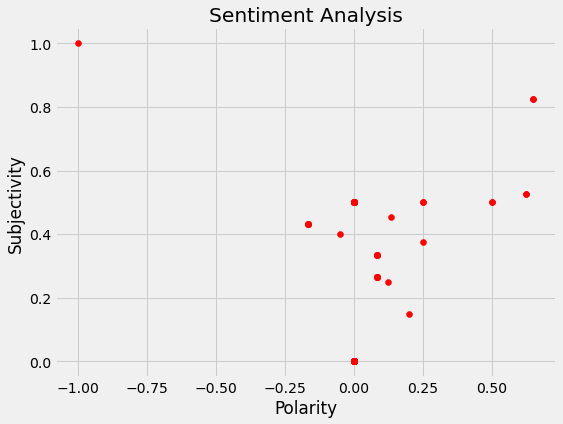

In [25]:
# plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()                                                      

In [26]:
def pt():
    tts = df[df.Analysis == 'Positive']
    tts = tts['Tweets']
    return round((tts.shape[0]/df.shape[0]) * 100, 1)

def nt():
    tts = df[df.Analysis == 'Negative']
    tts = tts['Tweets']
    return round((tts.shape[0]/df.shape[0]) * 100, 1)

print("Percentage of positive tweets: ", pt())
print("Percentage of negative tweets: ", nt())

Percentage of positive tweets:  25.0
Percentage of negative tweets:  8.0
